<a href="https://colab.research.google.com/github/seokmin1/PDM08/blob/main/py-tensorflow/DL2_CNN/dl2_01_mnist_CNN_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of mnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    - > 2차원 필터로 영상을 대표하는 특징을 추출
    * FCN : 1차원 완전연결신경망
    - > Conv2D에서 추출된 대표 특징들을 이용하여 FCN으로 최종 학습 완료

***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

print(tf.__version__)

2.7.0


## **데이터 로딩, 정규화**

In [8]:
from keras.datasets import mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

11501568/11490434 [==============================] - 0s 0us/step
X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [9]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

### Display numbers
- 10 representative numbers

(5923, 28, 28)
(6742, 28, 28)
(5958, 28, 28)
(6131, 28, 28)
(5842, 28, 28)
(5421, 28, 28)
(5918, 28, 28)
(6265, 28, 28)
(5851, 28, 28)
(5949, 28, 28)


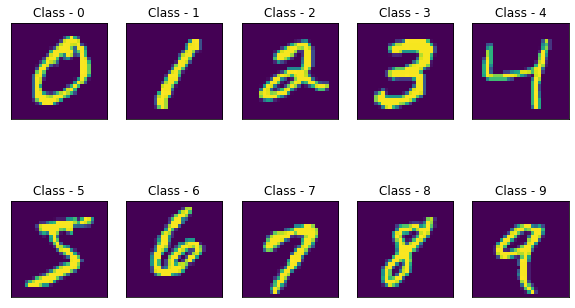

In [10]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class - %d" % (i))
    plt.xticks([])
    plt.yticks([])




# Design CNN

### import Conv2D, MaxPool2D

In [11]:
from keras.layers import Conv2D, MaxPool2D, Flatten

## **CNN1 + FCN2**
- CNN1: Conv2D + MaxPooling2D
- FCN2: Dense(128) + Output(10
) 

In [12]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [13]:
c1f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c1f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [14]:
c1f2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [15]:
3*3*32+32


320

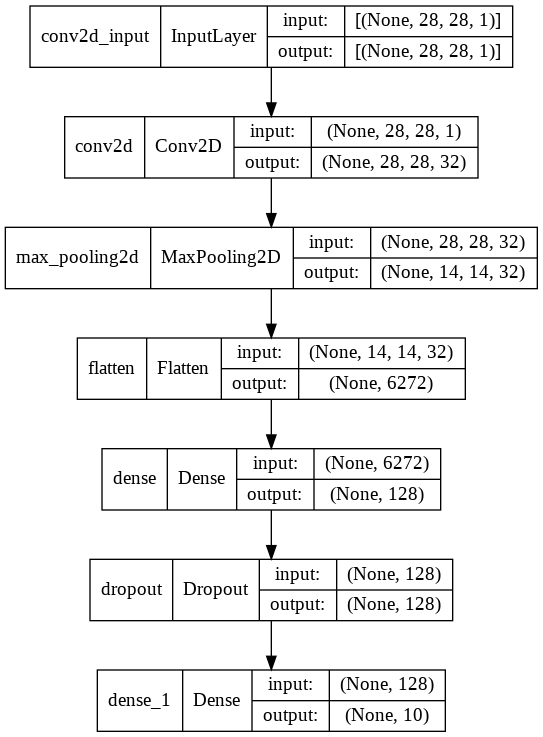

In [16]:
# Plot model
from tensorflow.keras.utils import plot_model
plot_model(c1f2, show_shapes=True, show_layer_names=True, to_file='model_c1f2.png')

In [17]:
c1f2.fit(X_train, y_train, epochs = 20,  batch_size = 100, 
            validation_data = (X_test, y_test))

Epoch 1/20
600/600 [==============================] - 18s 8ms/step - loss: 0.2419 - accuracy: 0.9289 - val_loss: 0.0772 - val_accuracy: 0.9760
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0820 - accuracy: 0.9761 - val_loss: 0.0557 - val_accuracy: 0.9809
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0574 - accuracy: 0.9830 - val_loss: 0.0453 - val_accuracy: 0.9844
Epoch 4/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0457 - accuracy: 0.9861 - val_loss: 0.0383 - val_accuracy: 0.9865
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0369 - accuracy: 0.9883 - val_loss: 0.0416 - val_accuracy: 0.9862
Epoch 6/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0300 - accuracy: 0.9905 - val_loss: 0.0394 - val_accuracy: 0.9871
Epoch 7/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0265 - accuracy: 0.9918 - val_loss: 0.0350 - val_accuracy: 0.9884
Epoch

In [18]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0441 - accuracy: 0.9885


[0.044120416045188904, 0.9884999990463257]

---

## **CNN1 + FCN3**

In [19]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [20]:
c1f3 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

c1f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [21]:
c1f3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               1605888   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                      

In [22]:
c1f3.fit(X_train,y_train, epochs= 20 , batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 8ms/step - loss: 0.2421 - accuracy: 0.9267
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0748 - accuracy: 0.9776
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0526 - accuracy: 0.9839
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0375 - accuracy: 0.9880
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0303 - accuracy: 0.9901
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0228 - accuracy: 0.9928
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0193 - accuracy: 0.9937
Epoch 8/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0178 - accuracy: 0.9941
Epoch 9/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0158 - accuracy: 0.9948
Epoch 10/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0133 - accuracy: 0.9954

In [23]:
c1f3.evaluate(X_test, y_test, batch_size= 100)

100/100 [==============================] - 1s 4ms/step - loss: 0.0525 - accuracy: 0.9885


[0.05251014977693558, 0.9884999990463257]

## **CNN2 + FCN2**

In [24]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [25]:
c2f2 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 64, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
       MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),   
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [26]:
c2f2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [27]:
c2f2.fit(X_train, y_train, epochs = 20 , batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2212 - accuracy: 0.9324
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0664 - accuracy: 0.9803
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0468 - accuracy: 0.9855
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0367 - accuracy: 0.9885
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0300 - accuracy: 0.9904
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0264 - accuracy: 0.9917
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0230 - accuracy: 0.9926
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0185 - accuracy: 0.9943
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0170 - accuracy: 0.9945
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0149 - accuracy: 0.9951

In [28]:
c2f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0254 - accuracy: 0.9936


[0.02537260577082634, 0.9936000108718872]

## **CNN2 + FCN3**

In [29]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [30]:
c2f3 = tf.keras.models.Sequential([ 
  Conv2D(input_shape=(28,28,1), filters= 64, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
       MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(filters= 32, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),   
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [31]:
c2f3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [32]:
c2f3.fit(X_train, y_train, epochs=20, batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.3021 - accuracy: 0.9065
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0893 - accuracy: 0.9742
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0626 - accuracy: 0.9823
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0515 - accuracy: 0.9852
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0424 - accuracy: 0.9872
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0350 - accuracy: 0.9902
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0322 - accuracy: 0.9901
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0244 - accuracy: 0.9924
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0244 - accuracy: 0.9926
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0224 - accuracy: 0.9933

In [33]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0441 - accuracy: 0.9885


[0.044120416045188904, 0.9884999990463257]

In [34]:
c1f3.evaluate(X_test, y_test, batch_size = 100)


100/100 [==============================] - 1s 5ms/step - loss: 0.0525 - accuracy: 0.9885


[0.05251014977693558, 0.9884999990463257]

In [35]:
c2f2.evaluate(X_test, y_test, batch_size = 100)


100/100 [==============================] - 1s 6ms/step - loss: 0.0254 - accuracy: 0.9936


[0.02537260577082634, 0.9936000108718872]

# **[DIY] Hidden layer에 따른 정확도**

In [36]:
c2f3.evaluate(X_test, y_test, batch_size = 100)


100/100 [==============================] - 1s 6ms/step - loss: 0.0327 - accuracy: 0.9924


[0.032720018178224564, 0.9923999905586243]

In [37]:
c2f3.save('c2f3_best.hdf5')

In [38]:
# Try another method!!  
cnn_result = [[0.04554083198308945, 0.9894999861717224], #c1f2 결과
 [0.057263847440481186, 0.9886999726295471], #c1f3 결과
 [0.028542926535010338, 0.9925000071525574], #c2f2
 [0.041836198419332504, 0.9909999966621399]]   #c2f3 결과

In [39]:
# select accuracies
accuracy = [row[1] for row in cnn_result]
accuracy

[0.9894999861717224,
 0.9886999726295471,
 0.9925000071525574,
 0.9909999966621399]

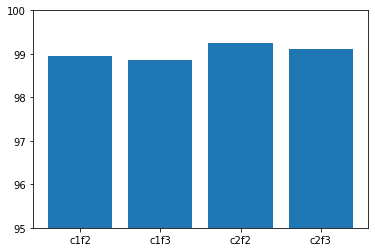

In [40]:
x = np.arange(4)
cnns = ['c1f2','c1f3','c2f2','c2f3']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim((95,100))
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [41]:
c2f2.save('c2f2_best.hdf5')

In [42]:
from keras.models import load_model

model = load_model('c2f2_best.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0254 - accuracy: 0.9936


[0.02537260577082634, 0.9936000108718872]

## C2F2 모델에 대한 loss, accuracy 그래프를 그리시오.

In [43]:
hist = c2f2.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size =100, 
         validation_data=(X_test,y_test))

Epoch 1/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0061 - accuracy: 0.9978 - val_loss: 0.0395 - val_accuracy: 0.9914
Epoch 2/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0061 - accuracy: 0.9980 - val_loss: 0.0298 - val_accuracy: 0.9930
Epoch 3/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.0371 - val_accuracy: 0.9921
Epoch 4/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.0367 - val_accuracy: 0.9922
Epoch 5/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0061 - accuracy: 0.9979 - val_loss: 0.0427 - val_accuracy: 0.9913
Epoch 6/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.0344 - val_accuracy: 0.9922
Epoch 7/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 0.0349 - val_accuracy: 0.9927
Ep

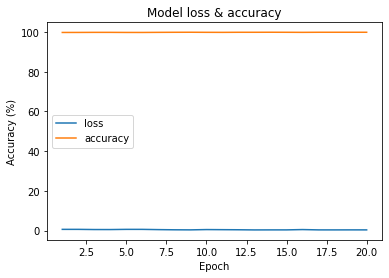

In [44]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

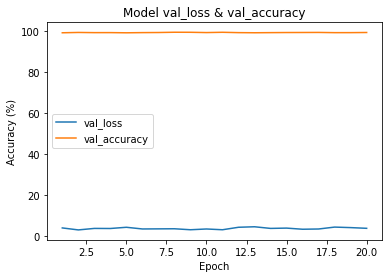

In [45]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

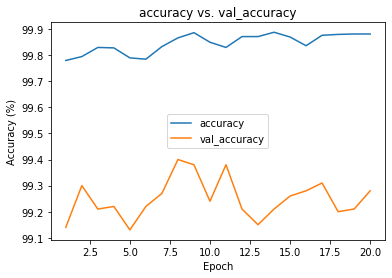

In [46]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')

***

## [DIY] C2F3 모델에 대한 loss, accuracy 그래프를 추가하시오.

In [47]:
# Code here!
from keras.models import load_model

model = load_model('c2f3_best.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0327 - accuracy: 0.9924


[0.032720018178224564, 0.9923999905586243]

In [48]:
 [0.041836198419332504, 0.9909999966621399]   #c2f3 결과

[0.041836198419332504, 0.9909999966621399]

In [49]:
hist = model.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size = 100, 
         validation_data=(X_test,y_test)) 

Epoch 1/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0296 - val_accuracy: 0.9927
Epoch 2/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.0282 - val_accuracy: 0.9935
Epoch 3/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.0326 - val_accuracy: 0.9927
Epoch 4/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0078 - accuracy: 0.9975 - val_loss: 0.0360 - val_accuracy: 0.9925
Epoch 5/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 0.0391 - val_accuracy: 0.9928
Epoch 6/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0087 - accuracy: 0.9973 - val_loss: 0.0301 - val_accuracy: 0.9931
Epoch 7/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0087 - accuracy: 0.9971 - val_loss: 0.0324 - val_accuracy: 0.9922
E

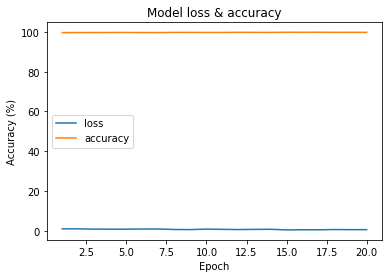

In [50]:
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

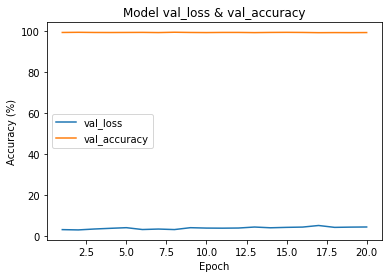

In [51]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')
plt.show()

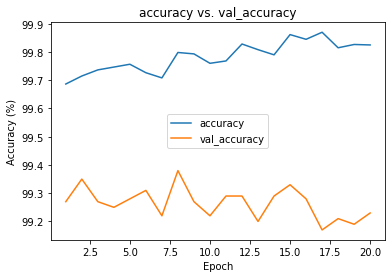

In [52]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')